In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append(r"..")

import tools
import itertools

In [11]:
df = pd.read_csv("boston_house_prices.csv", header=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
df.columns = df.columns.str.lower()

In [13]:
tools.reduce_mem_usage(df)

Memory usage of dataframe is 0.05 MB
Memory usage after optimization is: 0.02 MB
Decreased by 56.5%


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,22.400000
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,20.600000
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,23.900000
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,22.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   crim     506 non-null    float32 
 1   zn       506 non-null    float32 
 2   indus    506 non-null    float32 
 3   chas     506 non-null    category
 4   nox      506 non-null    float32 
 5   rm       506 non-null    float32 
 6   age      506 non-null    float32 
 7   dis      506 non-null    float32 
 8   rad      506 non-null    category
 9   tax      506 non-null    int16   
 10  ptratio  506 non-null    float32 
 11  b        506 non-null    float32 
 12  lstat    506 non-null    float32 
 13  medv     506 non-null    float32 
dtypes: category(2), float32(11), int16(1)
memory usage: 24.1 KB


Проверка на пустые и нулевые значения:

In [15]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [44]:
df[df == 0].count()

crim         0
zn         231
indus        0
chas       316
nox          0
rm           0
age          0
dis          0
rad          0
tax          0
ptratio      0
b            0
lstat        0
medv         0
dtype: int64

Проверка выбросов:

In [17]:
nFeatures = df.select_dtypes([np.integer, np.floating]).columns

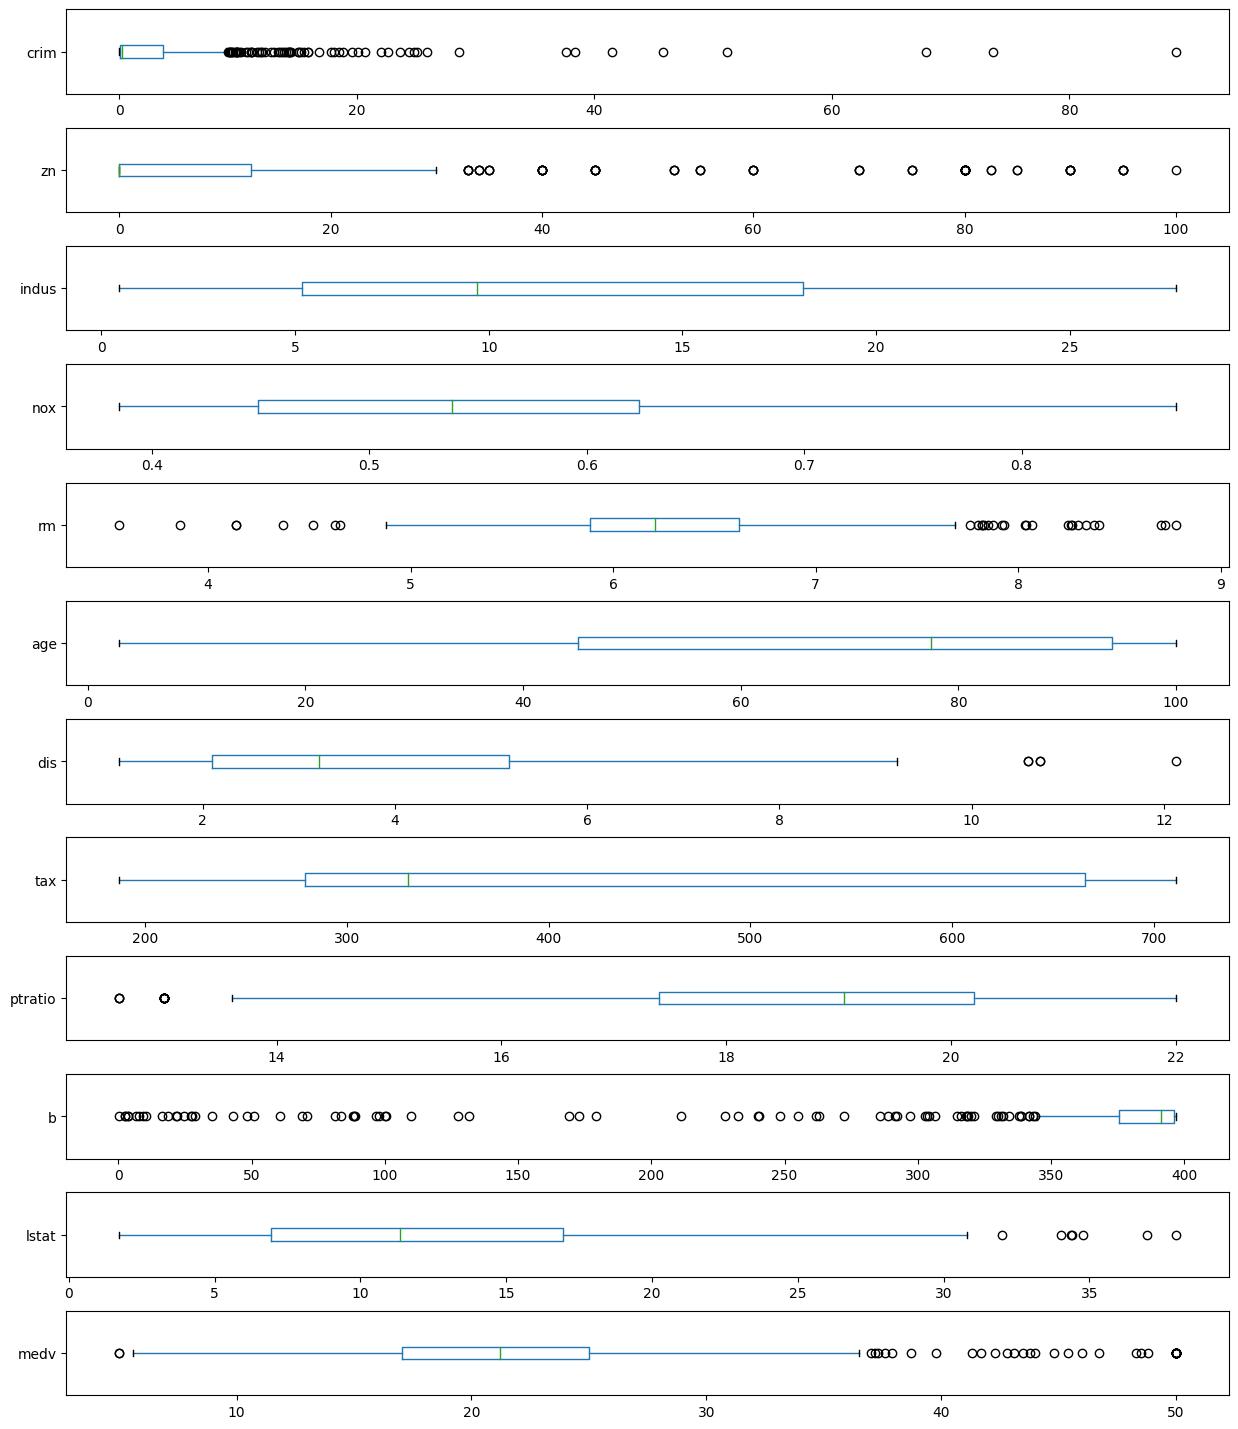

{'crim': [0.006320000160485506, 8.982959747314453],
 'zn': [0.0, 30.0],
 'indus': [0.46000000834465027, 27.739999771118164],
 'nox': [0.38499999046325684, 0.8709999918937683],
 'rm': [4.880000114440918, 7.690999984741211],
 'age': [2.9000000953674316, 100.0],
 'dis': [1.1296000480651855, 9.222900390625],
 'tax': [187.0, 711.0],
 'ptratio': [13.600000381469727, 22.0],
 'b': [344.9100036621094, 396.8999938964844],
 'lstat': [1.7300000190734863, 30.809999465942383],
 'medv': [5.599999904632568, 36.5]}

In [18]:
fig, ax = plt.subplots(
    nrows=nFeatures.size,
    ncols=1,
    figsize=(15, nFeatures.size * 1.5)
)
fig.subplots_adjust(hspace=0.4)

valRanges = {}
for i, col in enumerate(nFeatures):
    # ax[i].set_xscale("log")
    _, bp = df.boxplot(
        column=col,
        vert=False,
        ax=ax[i],
        grid=False,
        return_type="both"
    )
    valRanges[col] = [w._x[1] for w in bp['whiskers']]  # Границы по "усам"

plt.show()
valRanges

In [19]:
df.describe()

,crim,zn,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136780,0.554695,6.284634,68.574898,3.795043,408.237154,18.455534,356.674042,12.653064,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294861,7.141061,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.074999,5.188425,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.899994,37.970001,50.000000


Удаление строк с выбросами:

In [20]:
# Подгонка - не всё будем считать выбросами
valRanges['crim'][1] = 30
del valRanges['zn']
del valRanges['rm']
del valRanges['b']
valRanges['medv'][1] = 45

In [21]:
print(df.shape[0])
for col, rng in valRanges.items():
    df = df[(df[col] >= rng[0]) & (df[col] <= rng[1])]
print(df.shape[0])

506
453


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   crim     453 non-null    float32 
 1   zn       453 non-null    float32 
 2   indus    453 non-null    float32 
 3   chas     453 non-null    category
 4   nox      453 non-null    float32 
 5   rm       453 non-null    float32 
 6   age      453 non-null    float32 
 7   dis      453 non-null    float32 
 8   rad      453 non-null    category
 9   tax      453 non-null    int16   
 10  ptratio  453 non-null    float32 
 11  b        453 non-null    float32 
 12  lstat    453 non-null    float32 
 13  medv     453 non-null    float32 
dtypes: category(2), float32(11), int16(1)
memory usage: 25.0 KB


Проверка распределений:

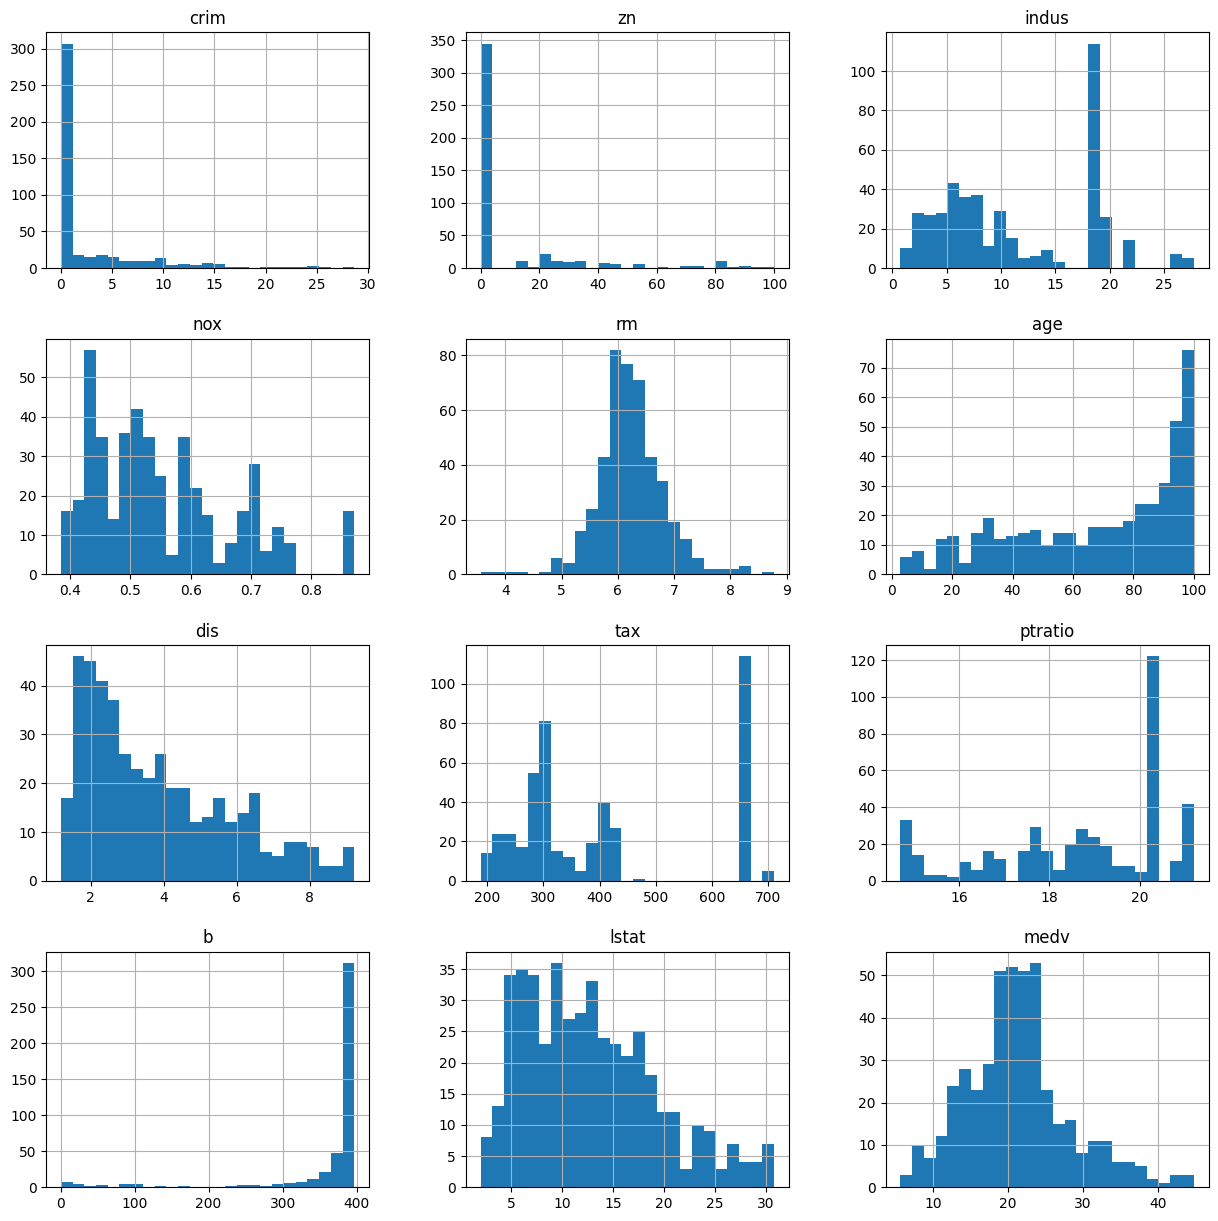

In [23]:
df.hist(
    figsize=(15, 15),
    bins=25
)

plt.show()

In [24]:
# [df[col].value_counts().head(3) for col in df.columns]
[(df[col].value_counts().head(3), df[col].nunique()) for col in df.columns]

[(crim
  14.33370    2
  0.00632     1
  0.24103     1
  Name: count, dtype: int64,
  452),
 (zn
  0.0     345
  12.5     10
  22.0     10
  Name: count, dtype: int64,
  26),
 (indus
  18.10    114
  19.58     26
  8.14      22
  Name: count, dtype: int64,
  69),
 (chas
  0    425
  1     28
  Name: count, dtype: int64,
  2),
 (nox
  0.538    23
  0.713    18
  0.437    17
  Name: count, dtype: int64,
  76),
 (rm
  6.229    3
  5.713    3
  6.127    3
  Name: count, dtype: int64,
  401),
 (age
  100.000000    30
  97.900002      4
  96.000000      4
  Name: count, dtype: int64,
  332),
 (dis
  3.4952    5
  6.8147    4
  5.7209    4
  Name: count, dtype: int64,
  367),
 (rad
  24    114
  4     102
  5      96
  Name: count, dtype: int64,
  9),
 (tax
  666    114
  307     37
  403     26
  Name: count, dtype: int64,
  60),
 (ptratio
  20.200001    122
  14.700000     28
  21.000000     27
  Name: count, dtype: int64,
  41),
 (b
  396.899994    114
  395.239990      3
  393.739990     

In [25]:
df[df.indus == df.indus.mode()[0]]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
356,8.98296,0.0,18.1,1,0.770,6.212,97.400002,2.1222,24,666,20.200001,377.730011,17.60,17.799999
357,3.84970,0.0,18.1,1,0.770,6.395,91.000000,2.5052,24,666,20.200001,391.339996,13.27,21.700001
358,5.20177,0.0,18.1,1,0.770,6.127,83.400002,2.7227,24,666,20.200001,395.429993,11.48,22.700001
359,4.26131,0.0,18.1,0,0.770,6.112,81.300003,2.5091,24,666,20.200001,390.739990,12.67,22.600000
360,4.54192,0.0,18.1,0,0.770,6.398,88.000000,2.5182,24,666,20.200001,374.559998,7.79,25.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2.81838,0.0,18.1,0,0.532,5.762,40.299999,4.0983,24,666,20.200001,392.920013,10.42,21.799999
484,2.37857,0.0,18.1,0,0.583,5.871,41.900002,3.7240,24,666,20.200001,370.730011,13.34,20.600000
485,3.67367,0.0,18.1,0,0.583,6.312,51.900002,3.9917,24,666,20.200001,388.619995,10.58,21.200001
486,5.69175,0.0,18.1,0,0.583,6.114,79.800003,3.5459,24,666,20.200001,392.679993,14.98,19.100000


Удаление строк, где признак indus имеет одинаковые значения:

In [26]:
df = df[df.indus != df.indus.mode()[0]]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   crim     339 non-null    float32 
 1   zn       339 non-null    float32 
 2   indus    339 non-null    float32 
 3   chas     339 non-null    category
 4   nox      339 non-null    float32 
 5   rm       339 non-null    float32 
 6   age      339 non-null    float32 
 7   dis      339 non-null    float32 
 8   rad      339 non-null    category
 9   tax      339 non-null    int16   
 10  ptratio  339 non-null    float32 
 11  b        339 non-null    float32 
 12  lstat    339 non-null    float32 
 13  medv     339 non-null    float32 
dtypes: category(2), float32(11), int16(1)
memory usage: 18.8 KB


In [28]:
[(df[col].value_counts().head(3), df[col].nunique()) for col in df.columns]

[(crim
  0.00632    1
  0.08244    1
  0.33983    1
  Name: count, dtype: int64,
  339),
 (zn
  0.0     231
  12.5     10
  22.0     10
  Name: count, dtype: int64,
  26),
 (indus
  19.58    26
  8.14     22
  6.20     15
  Name: count, dtype: int64,
  68),
 (chas
  0    316
  1     23
  Name: count, dtype: int64,
  2),
 (nox
  0.538    23
  0.437    17
  0.871    16
  Name: count, dtype: int64,
  59),
 (rm
  6.144    2
  5.966    2
  5.813    2
  Name: count, dtype: int64,
  311),
 (age
  100.000000    11
  21.400000      3
  32.200001      3
  Name: count, dtype: int64,
  286),
 (dis
  3.4952    5
  5.7209    4
  5.2873    4
  Name: count, dtype: int64,
  256),
 (rad
  4    102
  5     96
  3     37
  Name: count, dtype: int64,
  8),
 (tax
  307    37
  403    26
  437    14
  Name: count, dtype: int64,
  59),
 (ptratio
  14.700000    28
  21.000000    27
  17.799999    22
  Name: count, dtype: int64,
  41),
 (b
  396.899994    90
  395.239990     3
  396.059998     2
  Name: count, 

In [29]:
df[df.b == df.b.mode()[0]]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001
7,0.14455,12.5,7.87,0,0.524,6.172,96.099998,5.9505,5,311,15.200000,396.899994,19.15,27.100000
11,0.11747,12.5,7.87,0,0.524,6.009,82.900002,6.2267,5,311,15.200000,396.899994,13.27,18.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,0.23912,0.0,9.69,0,0.585,6.019,65.300003,2.4091,6,391,19.200001,396.899994,12.92,21.200001
500,0.22438,0.0,9.69,0,0.585,6.027,79.699997,2.4982,6,391,19.200001,396.899994,14.33,16.799999
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,20.600000
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,23.900000


Признак B лучше не включать в набор, т.к. много одинаковых значений, при том, что это разные районы.

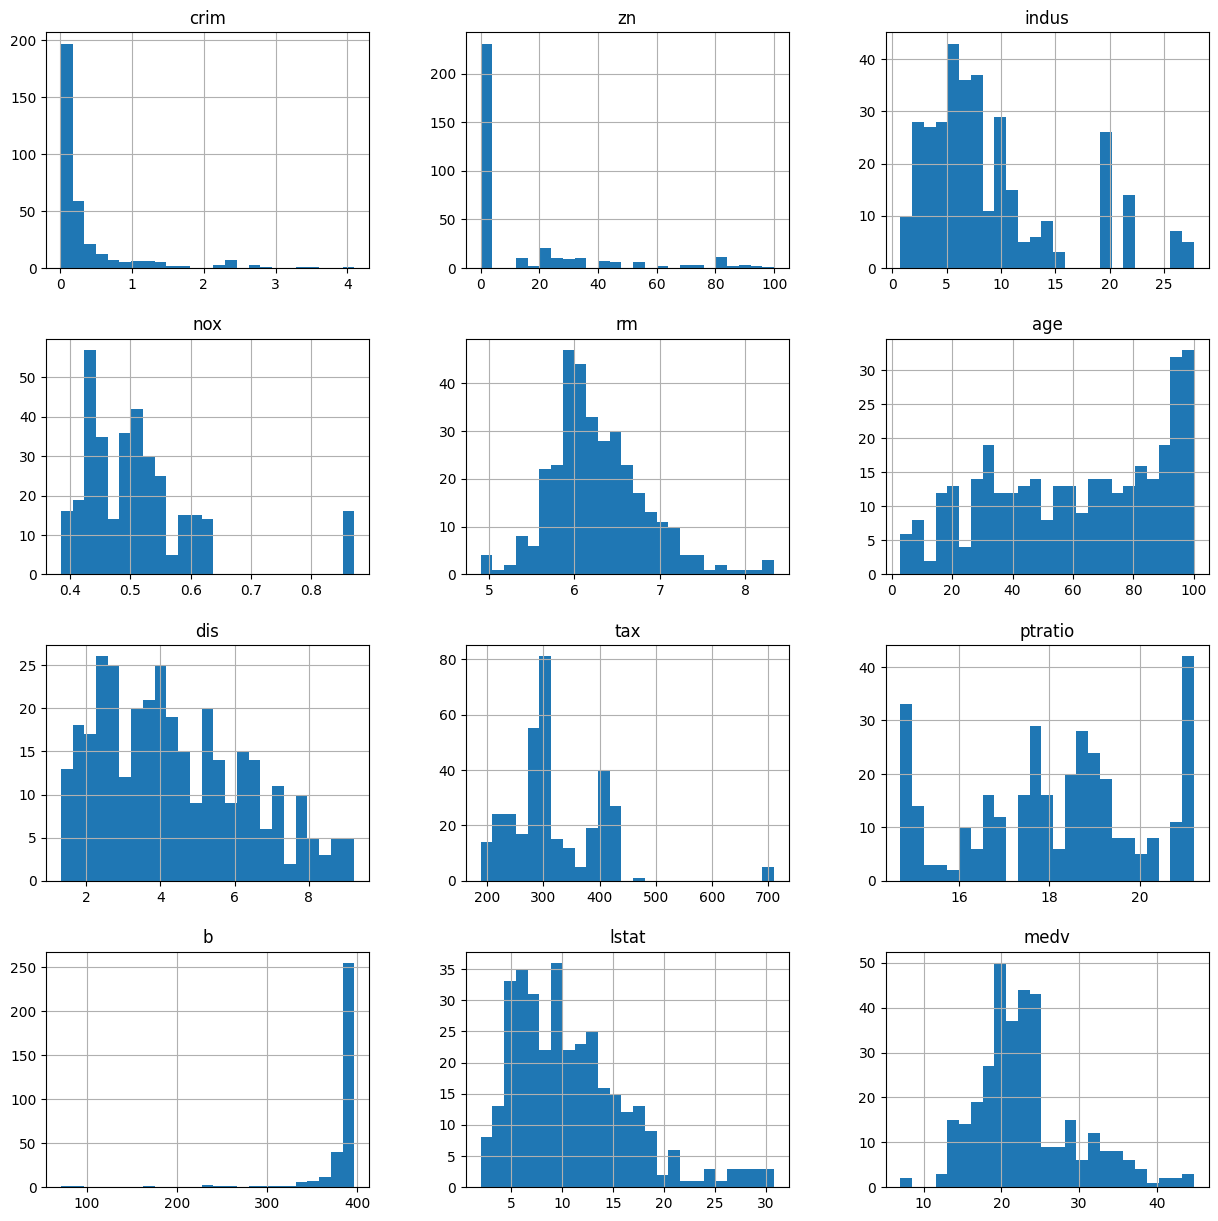

In [30]:
df.hist(
    figsize=(15, 15),
    bins=25
)

plt.show()

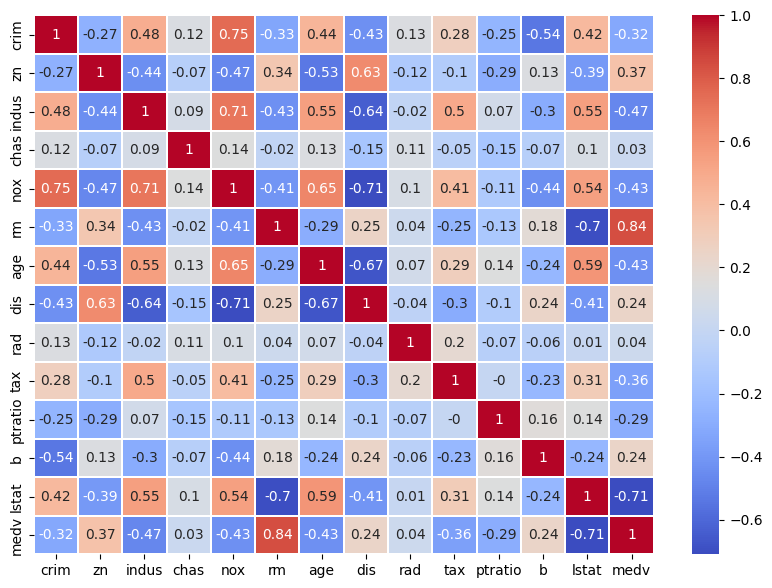

In [31]:
plt.figure(figsize = (10,7))
corrDf = df.corr()

sns.heatmap(
    corrDf.round(2),
    annot=True,
    linewidths=.25,
    cmap="coolwarm"
)

plt.show()

Целевой признак medv имеет сильную корреляцию с rm.

In [42]:
pairsToPlot = []
for p in itertools.combinations(df.columns, 2):
    if abs(corrDf.loc[p[0], p[1]]) > 0.6:
        pairsToPlot.append(p)

pairsToPlot

[('crim', 'nox'),
 ('zn', 'dis'),
 ('indus', 'nox'),
 ('indus', 'dis'),
 ('nox', 'age'),
 ('nox', 'dis'),
 ('rm', 'lstat'),
 ('rm', 'medv'),
 ('age', 'dis'),
 ('lstat', 'medv')]

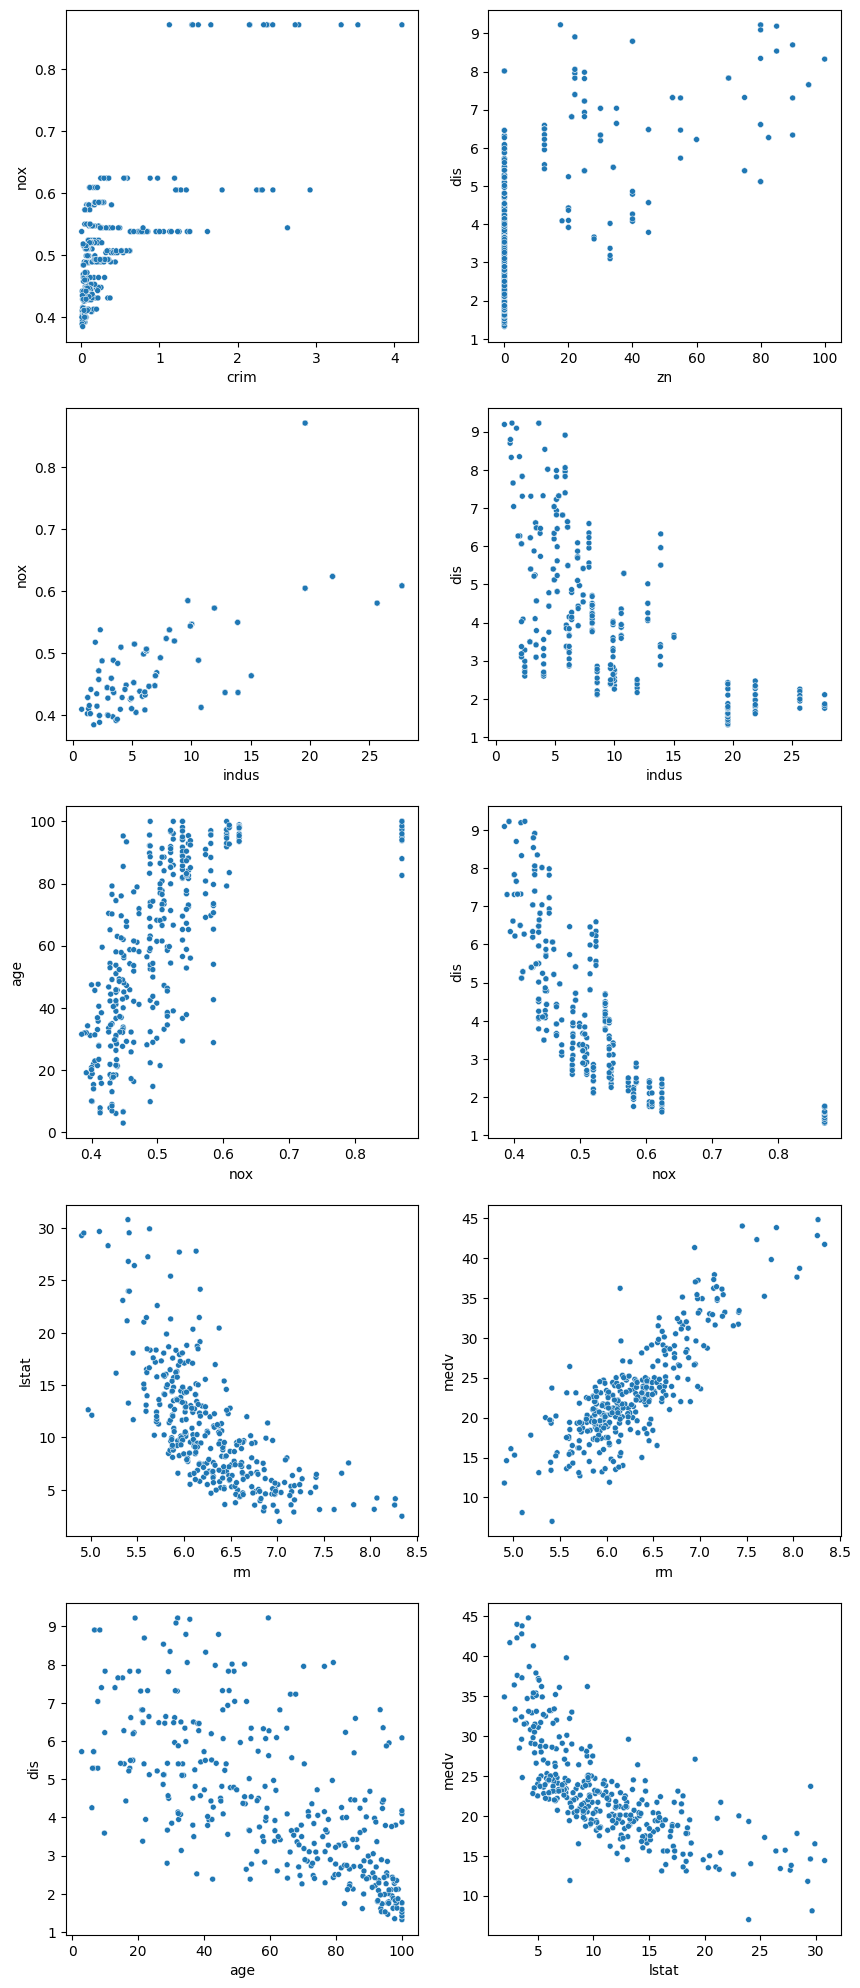

In [37]:
_, ax = plt.subplots(
    nrows=-(-len(pairsToPlot) // 2),
    ncols=2,
    figsize=(10, -(-len(pairsToPlot) // 2) * 5)
)

for i, p in enumerate(pairsToPlot):
    sns.scatterplot(x=df[p[0]], y=df[p[1]], size=1, legend=False, ax=ax[i // 2, i % 2])

plt.show()